# Introducción


![](img/Diagrama.jpg)

# Bibliografía

**An Introduction to Statistical Learning**: Gareth James, Daniela Witten et al.
https://www.statlearning.com/

**Pattern Recognition and Machine Learning**, M.Bishop: 
http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf

**Deep Learning**, Ian Goodfellow
http://www.deeplearningbook.org/

# Aprendizaje máquina vs Minería de Datos vs Estadística


### Estadística

En estadística vimos como realizar un análisis exploratorio de datos. Sabemos usar:
* Histogramas/Curvas de probabilidad/Kernel density estimation
* Diagramas de cajas (Boxplot)
* Comparar poblaciones: Tests estadísticos
* Entender como afectan una o varias variables a nuestros datos: Test estadísticos y regresiones

Siempre analizabamos el 100% de nuestros datos. Obteníamos una descripción detallada de nuestra población.
No haciamos predicciones

### Minería de datos

Utilizado para extraer información, conocimiento, útil de los datos en bruto.

### Aprendizaje máquina

En el aprendizaje máquina tenemos algoritmos que dados unos datos de entrada, es capaz de *aprender* como se comportan esos datos en función de los parámetros de entrada. 

El objetivo **no** es entender como afecta una variable o varias variables a nuestros datos.

El **objetivo** es **generalizar** el problema. Cuando llegue una variable con un valor que no ha visto nunca antes, es capaz de hacer una **estimación** lo suficientemente correcta.

# Jerarquía del conocimiento

https://es.wikipedia.org/wiki/Jerarqu%C3%ADa_del_conocimiento

La "Jerarquía del Conocimiento", también conocida como "Jerarquía DIKW", o "Pirámide del Conocimiento", podría ser definida como un conjunto de modelos para representar las relaciones aparentemente estructurales entre Datos, Información, Conocimiento, y en algunos casos Sabiduría.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/DIKW_Pyramid.svg/494px-DIKW_Pyramid.svg.png)

Por lo general:
* Información se define en términos de Datos.
* Conocimiento se define en términos de Información.
* Sabiduría en términos de Conocimiento.



![](https://pbs.twimg.com/media/EfYiz2AWsAAiPxh?format=jpg&name=small)

# Modelos estadísticos

https://xkcd.com/1838/
![](https://imgs.xkcd.com/comics/machine_learning.png)


Un modelo no es más que un conjunto de operaciones matemáticas a las cuales le das una entrada te propone una salida.

Todos los modelos son erróneos, pero algunos son útiles. https://en.wikipedia.org/wiki/All_models_are_wrong

Ejemplo de modelo útil sobre el [movimiento de los planetas](https://en.wikipedia.org/wiki/Apparent_retrograde_motion)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Apparent_retrograde_motion_of_Mars_in_2003.gif/375px-Apparent_retrograde_motion_of_Mars_in_2003.gif)


![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Ptolemaic_elements.svg/375px-Ptolemaic_elements.svg.png)


![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Copernican_heliocentrism_diagram-2.jpg/450px-Copernican_heliocentrism_diagram-2.jpg)

### Aprendizaje supervisado


En el aprendizaje supervisado nosotros enseñamos entradas y salidas. 

El algoritmo creará una **función** a partir de esos ejemplos. Este proceso se llama **entrenamiento**. El entrenamiento donde el algoritmo aprende.

Cuando le damos **datos nuevos**, una **función entrenada** nos dará el resultado correcto. 


![](./img/CajaNegra.png)



## Ejemplo de aprendizaje supervisado

Recordemos de estadística lo que era una regresión lineal:

Es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, las variables independientes $X_i$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
Y=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p+\varepsilon = \sum \beta_k X_k+\varepsilon
\\]

Un modelo de aprendizaje supervisado va a aprender de unos ejemplos que le pasemos de la forma más general posible. Así la próxima vez que le mostremos datos nuevos dará un resultado confiable.

In [1]:
library("dslabs")

Vamos a simular que soltamos un objeto desde lo alto de la torre de Pisa (55.86m) y medimos la distancia hasta al suelo que ese objeto presenta pasados $t$ segundos.

Evientemente, nuestras medidas tendrán un error, por eso vamos a tomar varias medidas y repetir el experimento varias veces.

In [2]:
data_train<-rfalling_object(n = 10)[c("time","observed_distance")]
head(data_train)

,time,observed_distance
,<dbl>,<dbl>
1,0.0000000,55.78181
2,0.3611111,53.44997
3,0.7222222,55.26417
4,1.0833333,50.19457
5,1.4444444,45.23720
6,1.8055556,40.46570


In [3]:
data_train<-rbind(data_train,rfalling_object(n = 5)[c("time","observed_distance")])
data_train<-rbind(data_train,rfalling_object(n = 7)[c("time","observed_distance")])
data_train<-rbind(data_train,rfalling_object(n = 20)[c("time","observed_distance")])

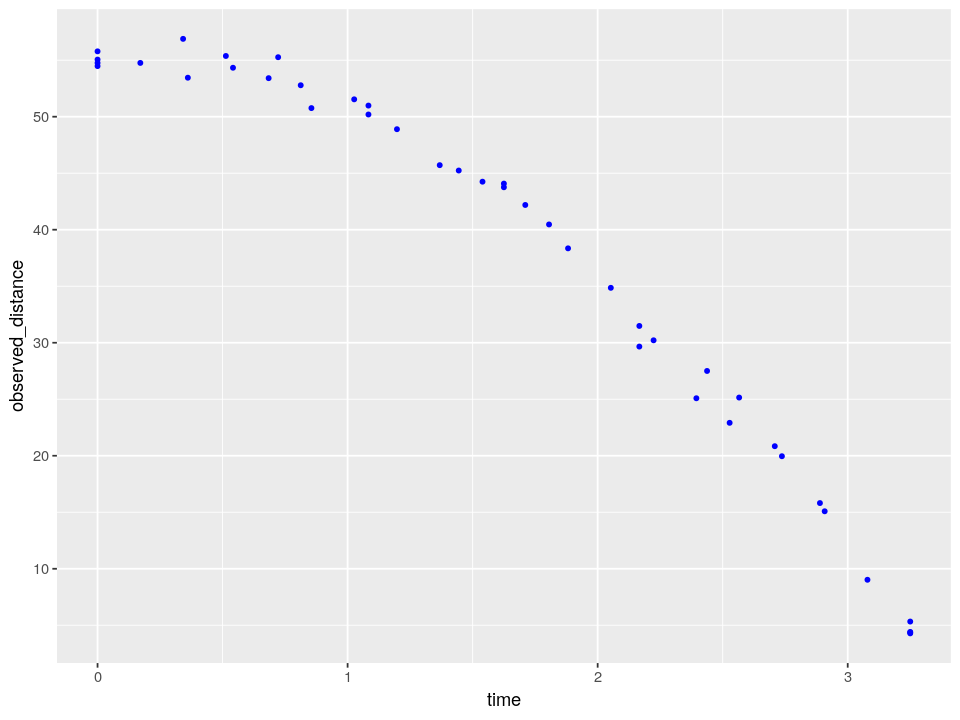

In [4]:
library(ggplot2)
options(repr.plot.height=6,repr.plot.width=8)
ggplot(data_train, aes(x=time,y=observed_distance))+geom_point(size=1,color="blue")

`geom_smooth()` using formula 'y ~ x'



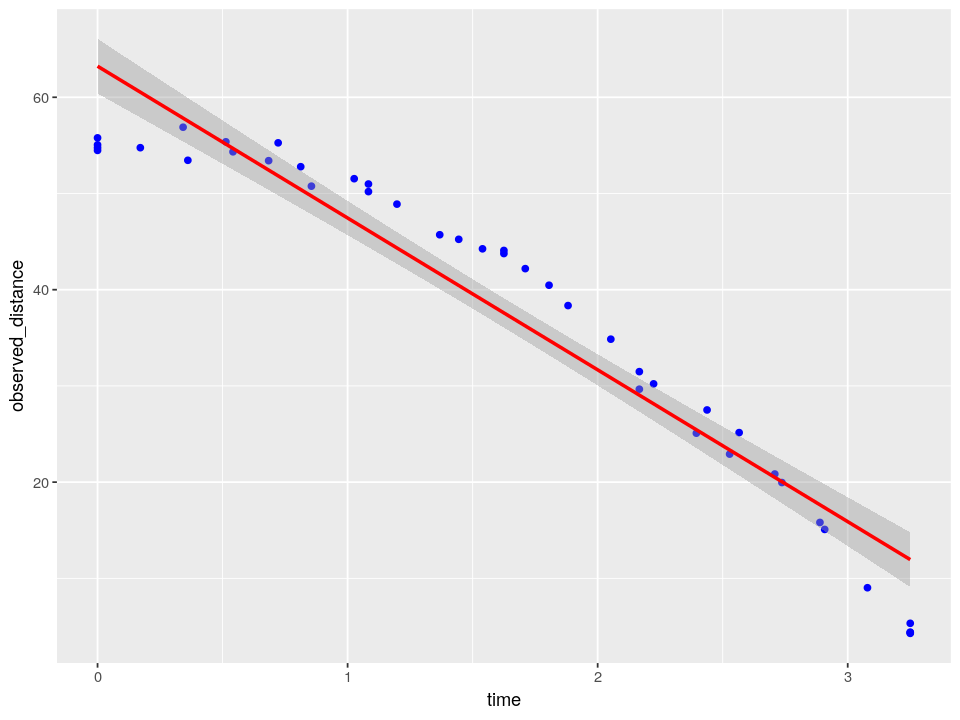

In [12]:
ggplot(data_train, aes(x=time, y=observed_distance))+geom_point(color='blue')+
geom_smooth(method='lm', color="red")

In [13]:
model <- lm(formula=observed_distance~time, data=data_train)
summary(model)


Call:
lm(formula = observed_distance ~ time, data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7521 -3.6264  0.7975  4.0707  6.4920 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  63.2298     1.4060   44.97   <2e-16 ***
time        -15.7793     0.7297  -21.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.896 on 40 degrees of freedom
Multiple R-squared:  0.9212,	Adjusted R-squared:  0.9192 
F-statistic: 467.7 on 1 and 40 DF,  p-value: < 2.2e-16


\\[
distancia = 63.23 - 15.78·time
\\]

En este caso estamos tratando de mejorar el error cuadrático medio:

Estamos tratando de minimizar la función de error.

In [15]:
sqrt(mean((data_train$observed_distance-model$fitted.values)^2))

[1] 4.778469

La próxima vez que tengamos datos nuevos, podremos realizar una estimación del resultado esperado.

In [17]:
data_test<-data.frame(time=c(1,3,5))
data_test
predict(model,data_test)

time
<dbl>
1
3
5


1         2         3 
 47.45050  15.89189 -15.66672

In [23]:
predict(model,data_test, interval='confidence', level = 0.8)

,fit,lwr,upr
1,47.45050,46.30053,48.60047
2,15.89189,14.25528,17.52850
3,-15.66672,-19.02332,-12.31011


Pero atentos, el modelo solo puede generalizar cuando los datos son parecidos a los que hemos visto. 

Aquí el modelo falla en predecir que una vez que el objeto toca el suelo no va a seguir cayendo.

In [24]:
#Vamos a probar con más datos:
nrow(data_train)
data_train2<-rbind(data_train,
                  rfalling_object(n = 30)[c("time","observed_distance")]) # Equivalente pd.concat()
nrow(data_train2)                  
                  


[1] 42

[1] 72

In [34]:
summary(lm(formula=observed_distance~time, data=data_train2[1:70,]))


Call:
lm(formula = observed_distance ~ time, data = data_train2[1:70, 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-8.846 -3.099  1.409  4.159  6.086 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  63.3241     1.0655   59.43   <2e-16 ***
time        -15.5275     0.5719  -27.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.722 on 68 degrees of freedom
Multiple R-squared:  0.9156,	Adjusted R-squared:  0.9143 
F-statistic: 737.2 on 1 and 68 DF,  p-value: < 2.2e-16


In [36]:
model2 <- lm(formula=observed_distance~I(time^2), data=data_train)
summary(model2)


Call:
lm(formula = observed_distance ~ I(time^2), data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1606 -0.6838  0.1352  0.7686  2.1740 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 55.62389    0.25907  214.71   <2e-16 ***
I(time^2)   -4.85762    0.05079  -95.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.151 on 40 degrees of freedom
Multiple R-squared:  0.9956,	Adjusted R-squared:  0.9955 
F-statistic:  9146 on 1 and 40 DF,  p-value: < 2.2e-16


\\[
distancia = 55.62 - 4.85·time^2
\\]

In [40]:
df_pred <- data.frame(time = seq(0,3, length.out = 20))
df_pred$pred <- predict(model2,df_pred)
head(df_pred)

,time,pred
,<dbl>,<dbl>
1,0.0000000,55.62389
2,0.1578947,55.50278
3,0.3157895,55.13947
4,0.4736842,54.53395
5,0.6315789,53.68622
6,0.7894737,52.59629


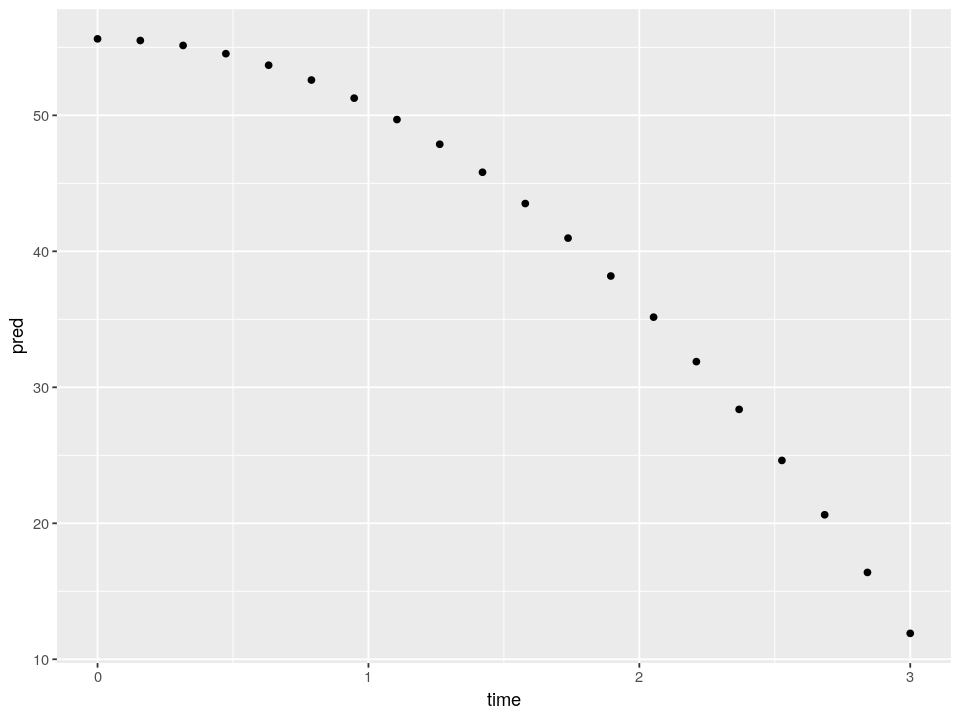

In [41]:
ggplot(df_pred, aes(x=time,y=pred))+geom_point()

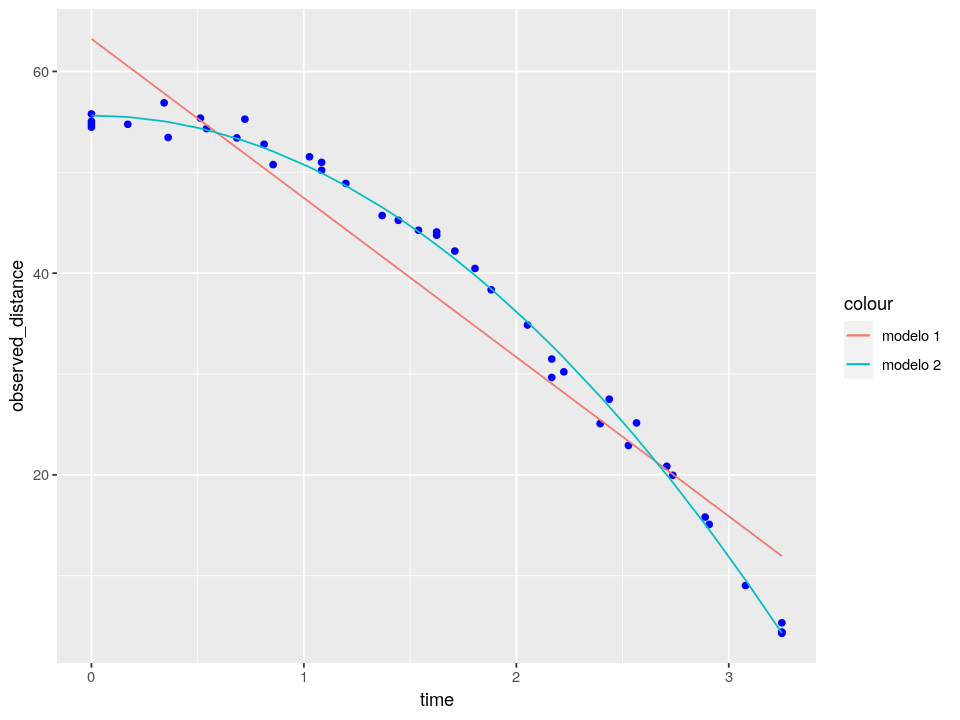

In [51]:
data_print <-data_train
data_print$pred2 <- predict(model2, data_print)
data_print$pred <- predict(model, data_print)

ggplot(data_print, aes(x=time, observed_distance))+geom_point(color='blue')+
 geom_line(aes(y=pred,color='modelo 1'))+geom_line(aes(y=pred2, color='modelo 2'))

In [46]:
head(data_print)

,time,observed_distance,pred2,pred
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000,55.78181,55.62389,63.22980
2,0.3611111,53.44997,54.99045,57.53172
3,0.7222222,55.26417,53.09013,51.83364
4,1.0833333,50.19457,49.92293,46.13556
5,1.4444444,45.23720,45.48886,40.43748
6,1.8055556,40.46570,39.78791,34.73939


### Aprendizaje NO supervisado 

Encuentra estructuras en los datos sin necesidad de intervención externa.

Nos puede servir para agrupar datos por similitud.

In [52]:
head(olive)

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Southern Italy,North-Apulia,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
2,Southern Italy,North-Apulia,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
3,Southern Italy,North-Apulia,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
4,Southern Italy,North-Apulia,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
5,Southern Italy,North-Apulia,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
6,Southern Italy,North-Apulia,9.11,0.49,2.68,79.24,6.78,0.51,0.70,0.44


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



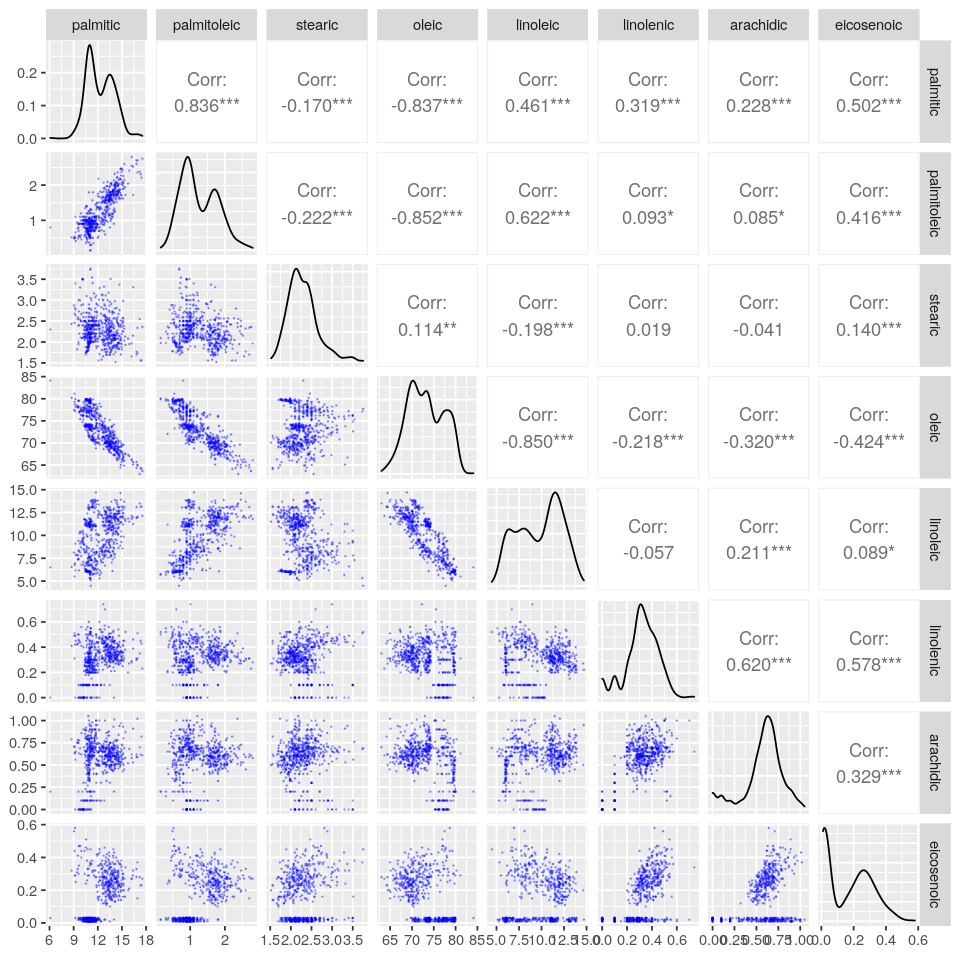

In [53]:
library(GGally)
options(repr.plot.height=8,repr.plot.width=8)
ggpairs(olive[,c("palmitic","palmitoleic","stearic","oleic","linoleic","linolenic","arachidic","eicosenoic")],
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )